<a href="https://colab.research.google.com/github/arifanwar0243/colabs/blob/main/materi/TransformasiKoordinat2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformasi Koordinat 2D (Indrazno Siradjuddin)

## Representasi koordinat titik terhadap frame




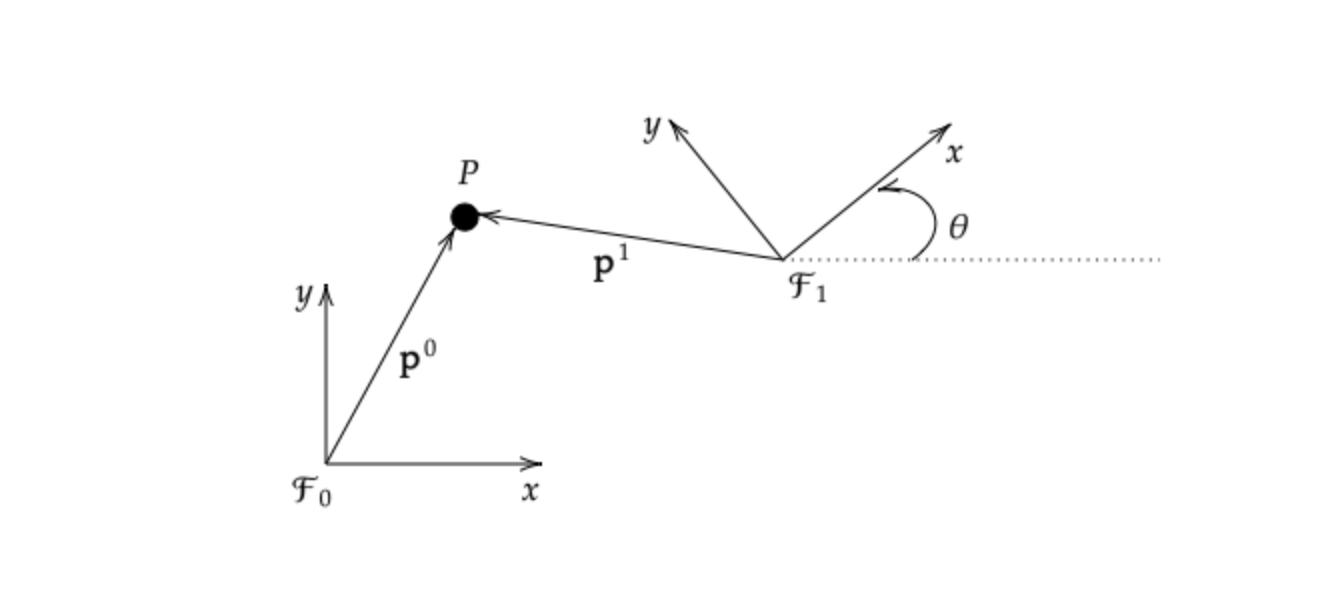

$\mathbf{p}^0$, adalah representasi posisi titik $P$ terhadap frame $\mathcal{F}_0$.

$\mathbf{p}^1$, adalah representasi posisi titik $P$ terhadap frame $\mathcal{F}_1$

Posisi dan orientasi frame $\mathcal{F}_1$ terhadap $\mathcal{F}_0$ direpresentasikan oleh posisi frame $\mathcal{F}_1$ terhadap $\mathcal{F}_0$, $\mathbf{d}^0_1$, dan orientasi $\theta$ yaitu sudut axis $x$ frame $\mathcal{F}_1$ terhadap axis $x$ frame $\mathcal{F}_0$


Persamaan Transformasi 2D

\begin{eqnarray}
\mathbf{p}^0 = \mathbf{R}^0_1 \mathbf{p}^1 + \mathbf{d}^0_1 
\end{eqnarray}

dimana 
\begin{eqnarray}
\mathbf{R}^0_1 =
\begin{bmatrix}
\cos \theta & - \sin \theta \\ 
\sin \theta & \cos \theta
\end{bmatrix} 
\end{eqnarray}

Jika diketahui $\mathbf{p}^0$, $\mathbf{R}^0_1$ dan $\mathbf{p}^0$, maka $\mathbf{p}_1$ dapat dicari dengan 

\begin{eqnarray}
\mathbf{p}^1 &=& (\mathbf{R}^0_1)^{-1}(\mathbf{p}^0 - \mathbf{d}_1^0) 
\end{eqnarray}

### Property dari matrik rotasi $\mathbf{R}$

\begin{eqnarray}
\mathbf{R}^{-1} &=& \mathbf{R}^{\mathsf{T}}
\end{eqnarray}

In [1]:
import numpy as np

def rotation(theta):
  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  return R

theta = np.radians(30)
R = rotation(theta)

Rinverse = np.linalg.inv(R)
Rtranspose = R.T

print("R inverse = \n", Rinverse)
print("R transpose = \n", Rtranspose)

R inverse = 
 [[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]
R transpose = 
 [[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]


In [2]:
p1 = np.array([4, 6])
theta = np.radians(90)
R = rotation(theta)
d10 = np.array([-3, 0])

p0 = np.dot(R, p1) + d10
print(p0)
p0 = R @ p1 + d10
print(p0)
p0 = R.dot(p1) + d10
print(p0)

[-9.  4.]
[-9.  4.]
[-9.  4.]


### Notasi Matriks Terhadap Frame

Jika diketahui rotasi matriks frame $\mathcal{F}_1$ terhadap $\mathcal{F}_0$

\begin{eqnarray}
\mathbf{R}^0_1
\end{eqnarray}

maka inverse dari rotasi matriks tersebut adalah
\begin{eqnarray}
(\mathbf{R}^0_1)^{-1} &=& (\mathbf{R}^0_1)^{\mathsf{T}} \\ 
&=& \mathbf{R}^1_0
\end{eqnarray}

dimana $\mathbf{R}^1_0$ adalah rotasi matriks frame $\mathcal{F}_0$ terhadap $\mathcal{F}_1$.

Sehingga persamaan (3)

\begin{eqnarray}
\mathbf{p}^1 &=& (\mathbf{R}^0_1)^{-1}(\mathbf{p}^0 - \mathbf{d}_1^0)
\end{eqnarray}

dapat ditulis dengan
\begin{eqnarray}
\mathbf{p}^1 &=& \mathbf{R}^1_0(\mathbf{p}^0 - \mathbf{d}_1^0)
\end{eqnarray}

### Transformasi dengan Multi Frame

#### Contoh 4 Frame
\begin{eqnarray}
\mathbf{p}^0 &=& \mathbf{R}^0_1 \mathbf{p}^1 + \mathbf{d}^0_1 \\ 
\mathbf{p}^1 &=& \mathbf{R}^1_2 \mathbf{p}^2 + \mathbf{d}^1_2 \\ 
\mathbf{p}^2 &=& \mathbf{R}^2_3 \mathbf{p}^3 + \mathbf{d}^2_3 \\ 
\end{eqnarray}

Maka
\begin{eqnarray}
\mathbf{p}^0 &=& \mathbf{R}^0_1 (\mathbf{R}^1_2 (\mathbf{R}^2_3 \mathbf{p}^3 + \mathbf{d}^2_3) + \mathbf{d}^1_2) + \mathbf{d}^0_1 \\ 
&=& \mathbf{R}^0_1 \mathbf{R}^1_2 \mathbf{R}^2_3 \mathbf{p}^3 + \mathbf{R}^0_1 \mathbf{R}^1_2  \mathbf{d}^2_3 + \mathbf{R}^0_1  \mathbf{d}^1_2 + \mathbf{d}^0_1 \\ 
&=& \mathbf{R}^0_3 \mathbf{p}^3 + \mathbf{R}^0_2 \mathbf{d}^2_3 +\mathbf{R}^0_1  \mathbf{d}^1_2 + \mathbf{d}^0_1 
\end{eqnarray}

## Visualisasi PYTHON
### Menggambar vektor 2D
\begin{eqnarray}
\mathbf{a} &=& [5,3]^{\mathsf{T}}
\end{eqnarray}

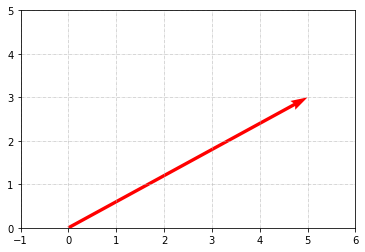

In [6]:
import numpy as np
import matplotlib.pyplot as plt
a = np.array([5,3])
o = np.array([0,0])
plt.quiver(*o, *a, scale=1, color='r', scale_units='xy', angles = 'xy', width=0.01)
plt.axis([ -1 ,6 , 0 ,5])
plt.grid(linestyle='-.', linewidth=0.5)

### Menggambar Frame $\mathcal{F}_0$

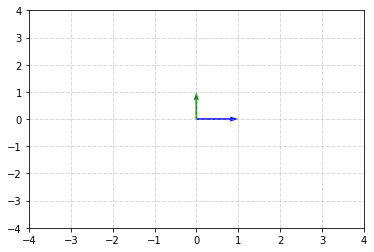

In [4]:
import numpy as np
import matplotlib.pyplot as plt
i = np.array([1,0])
j = np.array([0,1])
o = np.array([0,0])


plt.quiver(*o, *i, scale=1, color='b', scale_units='xy', angles = 'xy', width=0.005)
plt.quiver(*o, *j, scale=1, color='g', scale_units='xy', angles = 'xy', width=0.005)

#o = np.array([-1,-1])
#plt.quiver(*o, *i, scale=1, color='b', scale_units='xy', angles = 'xy', width=0.005)
#plt.quiver(*o, *j, scale=1, color='g', scale_units='xy', angles = 'xy', width=0.005)

plt.axis([ -4 ,4 , -4 ,4])
plt.grid(linestyle='-.', linewidth=0.5)

### Menggambar $\mathcal{F}_1$ terhadap $\mathcal{F}_0$

Jika diketahui $\mathbf{d}^0_1 = [2,3]^{\mathsf{T}}$ dan $\theta = 45^o$

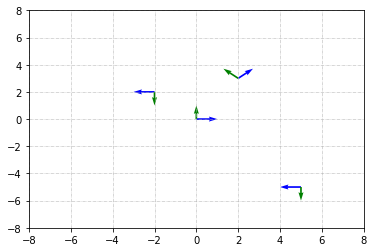

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def rotation(theta):
  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  return R

def framedrawing(o, d, R):
  i = np.array([1,0])
  j = np.array([0,1])
  ii = np.dot(R,i) #np.dot(R, i)
  jj = R @ j 
  oo = o + d
  plt.quiver(*oo, *ii, scale=1, color='b', scale_units='xy', angles = 'xy', width=0.005)
  plt.quiver(*oo, *jj, scale=1, color='g', scale_units='xy', angles = 'xy', width=0.005)

#frame 0
framedrawing(np.array([0,0]), np.array([0,0]), rotation(0))
#frame 1
R10 = rotation(np.radians(45))
framedrawing(np.array([0,0]), np.array([2,3]),  R10)
#frame2
R10 = rotation(np.radians(180))
framedrawing(np.array([0,0]), np.array([5,-5]),  R10)
#frame 3
R10 = rotation(np.radians(180))
framedrawing(np.array([0,0]), np.array([-2,2]),  R10)
plt.axis([ -8 ,8 , -8 ,8])
plt.grid(linestyle='-.', linewidth=0.5)
plt.show()


### Menggambar Point P terhadap Frame $\mathcal{F}_0$

Jika diketahui $\mathbf{p}^0 = [-2, 3]^{\mathsf{T}}$

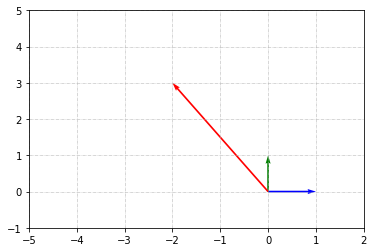

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def rotation(theta):
  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  return R

def framedrawing(o, d, R):
  i = np.array([1,0])
  j = np.array([0,1])
  ii = R @ i 
  jj = R @ j 
  oo = o + d
  plt.quiver(*oo, *ii, scale=1, color='b', scale_units='xy', angles = 'xy', width=0.005)
  plt.quiver(*oo, *jj, scale=1, color='g', scale_units='xy', angles = 'xy', width=0.005)

def vectordrawing(o, p):
  plt.quiver(*o, *p, scale=1, color='r', scale_units='xy', angles = 'xy', width=0.005)

#frame 0
framedrawing(np.array([0,0]), np.array([0,0]), rotation(0))
#point p
vectordrawing(np.array([0,0]), np.array([-2,3]))

plt.axis([ -5 ,2 , -1 ,5])
plt.grid(linestyle='-.', linewidth=0.5)
plt.show()

### Menggambar Vector $\mathbf{p}$ terhadap $\mathcal{F}_0$ dan $\mathcal{F}_1$

Jika diketahui
$\mathbf{p}^1=[-2,4]^{\mathsf{T}}$,  $\mathbf{d}^0_1 = [10,2]^{\mathsf{T}}$ dan $\theta = 45^o$

Maka
\begin{eqnarray}
\mathbf{p}^0 &=& \mathbf{R}^0_1 \mathbf{p}^1 + \mathbf{d}^0_1 \\ 
&=& 
\begin{bmatrix}
\cos(45) & -\sin(45) \\ 
\sin(45) & \cos(45)
\end{bmatrix}
\begin{bmatrix}
-2 \\ 
4
\end{bmatrix} + 
\begin{bmatrix}
10 \\ 
2
\end{bmatrix}
\\
&=& \begin{bmatrix}
5.75735931 \\ 
3.41421356
\end{bmatrix} 
\end{eqnarray}

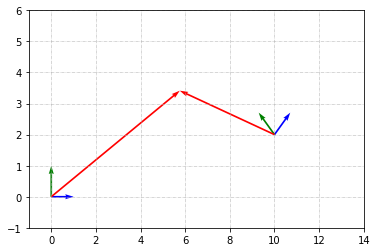

p0 =  [5.75735931 3.41421356]
p1 =  [-2  4]
d10 =  [10  2]
R10 = 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def rotation(theta):
  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  return R

def framedrawing(o, d, R):
  i = np.array([1,0])
  j = np.array([0,1])
  ii = R @ i 
  jj = R @ j 
  oo = o + d
  plt.quiver(*oo, *ii, scale=1, color='b', scale_units='xy', angles = 'xy', width=0.005)
  plt.quiver(*oo, *jj, scale=1, color='g', scale_units='xy', angles = 'xy', width=0.005)

def vectordrawing(o, p):
  plt.quiver(*o, *p, scale=1, color='r', scale_units='xy', angles = 'xy', width=0.005)


p1 = np.array([-2,4])
origin = np.array([0,0])
d10 = np.array([10,2])
theta10 = np.radians(45)

R10 = rotation(theta10)

p0 = R10 @ p1 + d10
#frame 0
framedrawing(origin, origin, rotation(0))
#vector p0
vectordrawing(origin, p0)

#frame 1
framedrawing(origin, d10, R10)
#vector p1
vectordrawing(d10, R10@p1)

plt.axis([ -1 ,14 , -1 ,6])
plt.grid(linestyle='-.', linewidth=0.5)
plt.show()
print("p0 = ", p0)
print("p1 = ", p1)
print("d10 = ", d10)
print("R10 = \n", R10)

## Menggambar Vektor $\mathbf{p}$ terhadap Frame $\mathcal{F}_0$, $\mathcal{F}_1$, $\mathcal{F}_2$

Jika diketahui


1.   $\mathbf{R}^0_1(\theta = 45^o)$, $\mathbf{d}^0_1 = [2,1]^{\mathsf{T}}$
2.   $\mathbf{R}^1_2(\theta = 30^o)$, $\mathbf{d}^1_2 = [-3,2]^{\mathsf{T}}$
3.   $\mathbf{p}^2 = [1,1]^{\mathsf{T}}$


\begin{eqnarray}
\mathbf{p}^0 &=& \mathbf{R}^0_1 \mathbf{p}^1 + \mathbf{d}^0_1 \\ 
\mathbf{p}^1 &=& \mathbf{R}^1_2 \mathbf{p}^2 + \mathbf{d}^1_2 \\ 
\end{eqnarray}

\begin{eqnarray}
\mathbf{p}^0 &=& \mathbf{R}^0_1 (\mathbf{R}^1_2 \mathbf{p}^2 + \mathbf{d}^1_2) + \mathbf{d}^0_1 \\ 
\mathbf{p}^0 &=& \mathbf{R}^0_1 \mathbf{R}^1_2 \mathbf{p}^2 + \underbrace{\mathbf{R}^0_1\mathbf{d}^1_2 + \mathbf{d}^0_1}_{\mathbf{d}^0_2} \\ 
\end{eqnarray}


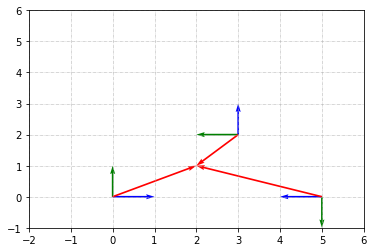

p0 =  [2. 1.]
p1 =  [-1.  1.]
p2 =  [ 3 -1]
R10 @ p1 =  [-1. -1.]
R10 @ R21 @ p2 =  [-3.  1.]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def rotation(theta):
  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  return R

def framedrawing(o, d, R):
  i = np.array([1,0])
  j = np.array([0,1])
  ii = R @ i 
  jj = R @ j 
  oo = o + d
  plt.quiver(*oo, *ii, scale=1, color='b', scale_units='xy', angles = 'xy', width=0.005)
  plt.quiver(*oo, *jj, scale=1, color='g', scale_units='xy', angles = 'xy', width=0.005)

def vectordrawing(o, p):
  plt.quiver(*o, *p, scale=1, color='r', scale_units='xy', angles = 'xy', width=0.005)

d10 = np.array([3,2])
theta10 = np.radians(90)
R10 = rotation(theta10)
d21 = np.array([-2,-2])
theta21 = np.radians(90)
R21 = rotation(theta21) 
origin = np.array([0,0])

d20 = R10@d21 + d10
R20 = R10@R21

p2 = np.array([3,-1])
p1 = R21 @ p2 + d21
p0 = R10 @ R21 @ p2 + R10 @ d21 + d10

#plt.figure(figsize=(10,10))

#frame 0
framedrawing(origin, origin, rotation(0))
#frame 1
framedrawing(origin, d10, R10)
#frame 2
framedrawing(origin, d20, R20)

#p0
vectordrawing(origin, p0)

#p1
vectordrawing(d10,  R10 @ p1)

#p2
vectordrawing(d20,  R10 @ R21 @ p2)


plt.axis([ -2 ,6 , -1 ,6])
plt.grid(linestyle='-.', linewidth=0.5)
plt.show()

print("p0 = ", p0)
print("p1 = ", p1)
print("p2 = ", p2)
print("R10 @ p1 = ", R10 @ p1)
print("R10 @ R21 @ p2 = ", R10 @ R21 @ p2)



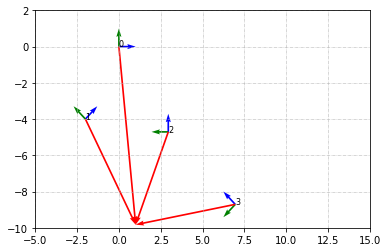

p0 =  [ 1.         -9.82842712]
p1 =  [-2.         -6.24264069]
p2 =  [-5.12132034  1.94974747]
d10 =  [-2 -4]
d20 =  [ 2.94974747 -4.70710678]
d30 =  [ 6.94974747 -8.70710678]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def rotation(theta):
  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  return R

def framedrawing(o, d, R):
  i = np.array([1,0])
  j = np.array([0,1])
  ii = R @ i 
  jj = R @ j 
  oo = o + d
  plt.quiver(*oo, *ii, scale=1, color='b', scale_units='xy', angles = 'xy', width=0.005)
  plt.quiver(*oo, *jj, scale=1, color='g', scale_units='xy', angles = 'xy', width=0.005)

def vectordrawing(o, p):
  plt.quiver(*o, *p, scale=1, color='r', scale_units='xy', angles = 'xy', width=0.005)

#5 frames
# Diketahui
# p5
# d54, d43, d32, d21, d10
# theta54, theta 43, theta32, theta21, theta10
# Dicari p0

p5 = np.array([3, 0])
d54 = np.array([1, -1])
d43 = np.array([2, 2])
d32 = np.array([-4, -4])
d21 = np.array([3, -4])
d10 = np.array([-2, -4])
theta54 = np.radians(45)
theta43 = np.radians(45)
theta32 = np.radians(45)
theta21 = np.radians(45)
theta10 = np.radians(45)
R54 = rotation(theta54)
R43 = rotation(theta43)
R32 = rotation(theta32)
R21 = rotation(theta21)
R10 = rotation(theta10)
p4 = R54@p5 + d54
p3 = R43@p4 + d43
p2 = R32@p3 + d32
p1 = R21@p2 + d21
p0 = R10@p1 + d10
R20 = R10@R21
d20 = R10@d21 + d10
R30 = R10@R21@R32
d30 = R10@R21@d32 + R10@d21 + d10
origin = np.array([0,0])
#plt.figure(figsize=(10,10))
#frame 0
framedrawing(origin, origin, rotation(0))
#frame 1
framedrawing(origin, d10, R10)
#frame 2
framedrawing(origin, d20, R20)
#frame 3
framedrawing(origin, d30, R30)
#p0
vectordrawing(origin, p0)
#p1
vectordrawing(d10,  R10 @ p1)
#p2
vectordrawing(d20,  R10 @ R21 @ p2)
#p3
vectordrawing(d30,  R10 @ R21 @ R32 @ p3)

plt.text(0, 0, '0', fontsize = 8)
plt.text(*d10, '1', fontsize = 8)
plt.text(*d20, '2', fontsize = 8)
plt.text(*d30, '3', fontsize = 8)



plt.axis([ -5 ,15 , -10 ,2])
plt.grid(linestyle='-.', linewidth=0.5)
plt.show()

print("p0 = ", p0)
print("p1 = ", p1)
print("p2 = ", p2)
print("d10 = ", d10)
print("d20 = ", d20)
print("d30 = ", d30)
#print("R10 @ R21 @ p2 = ", R10 @ R21 @ p2)